In [ ]:
from sklearn.datasets import load_iris 
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("/content/drive/MyDrive/DS/horse.csv", sep=',', nrows=299)
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [ ]:
data = data.drop(columns=['hospital_number', 'nasogastric_reflux_ph','abdomo_appearance','abdomo_protein'])

print('Old Size: %d' % len(data))
data = data.dropna(how = 'any', axis = 'rows')
print('New Size: %d' % len(data))

print('Check that there are no empty values after cleaning:')
is_null = pd.isnull(data).sum()
print(is_null)
data.corr()

data2 = pd.get_dummies(data, columns =['surgery','age','capillary_refill_time','surgical_lesion',
                                       'cp_data','abdominal_distention','temp_of_extremities',
                                      'peripheral_pulse','mucous_membrane','pain','peristalsis',
                                       'nasogastric_reflux','nasogastric_tube','rectal_exam_feces','abdomen'])
data2.head()
data2 = data2.replace({'outcome': {'lived': 1, 'died': 0, 'euthanized': np.nan}})
data2 = data2.dropna(how = 'any', axis = 'rows')

Old Size: 299
New Size: 52
Check that there are no empty values after cleaning:
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


In [ ]:
data.corr()


,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
rectal_temp,1.000000,0.325940,0.346372,0.047700,-0.171927,-0.030141,-0.013016,NaN
pulse,0.325940,1.000000,0.349160,0.560802,-0.042858,-0.069206,0.024787,NaN
respiratory_rate,0.346372,0.349160,1.000000,0.349607,-0.045596,-0.179267,-0.108626,NaN
packed_cell_volume,0.047700,0.560802,0.349607,1.000000,0.099596,-0.219921,0.007461,NaN
total_protein,-0.171927,-0.042858,-0.045596,0.099596,1.000000,-0.160902,0.415973,NaN
lesion_1,-0.030141,-0.069206,-0.179267,-0.219921,-0.160902,1.000000,-0.003456,NaN
lesion_2,-0.013016,0.024787,-0.108626,0.007461,0.415973,-0.003456,1.000000,NaN
lesion_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2 = pd.get_dummies(data, columns =['surgery','age','capillary_refill_time','surgical_lesion',
                                       'cp_data','abdominal_distention','temp_of_extremities',
                                      'peripheral_pulse','mucous_membrane','pain','peristalsis',
                                       'nasogastric_reflux','nasogastric_tube','rectal_exam_feces','abdomen'])
data2 = data2.replace({'outcome': {'lived': 1, 'died': 0, 'euthanized': np.nan}})
data2 = data2.dropna(how = 'any', axis = 'rows')

In [ ]:
data2.head()


,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,lesion_3,surgery_no,surgery_yes,age_adult,age_young,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other
6,37.9,48.0,16.0,37.0,7.0,1.0,3124,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
10,38.1,66.0,12.0,44.0,6.0,1.0,2124,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
14,38.2,76.0,28.0,46.0,81.0,1.0,2112,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
18,37.6,64.0,21.0,40.0,7.0,1.0,4205,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
20,39.9,72.0,60.0,46.0,6.1,1.0,2111,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0


In [ ]:
data2.shape

(48, 60)

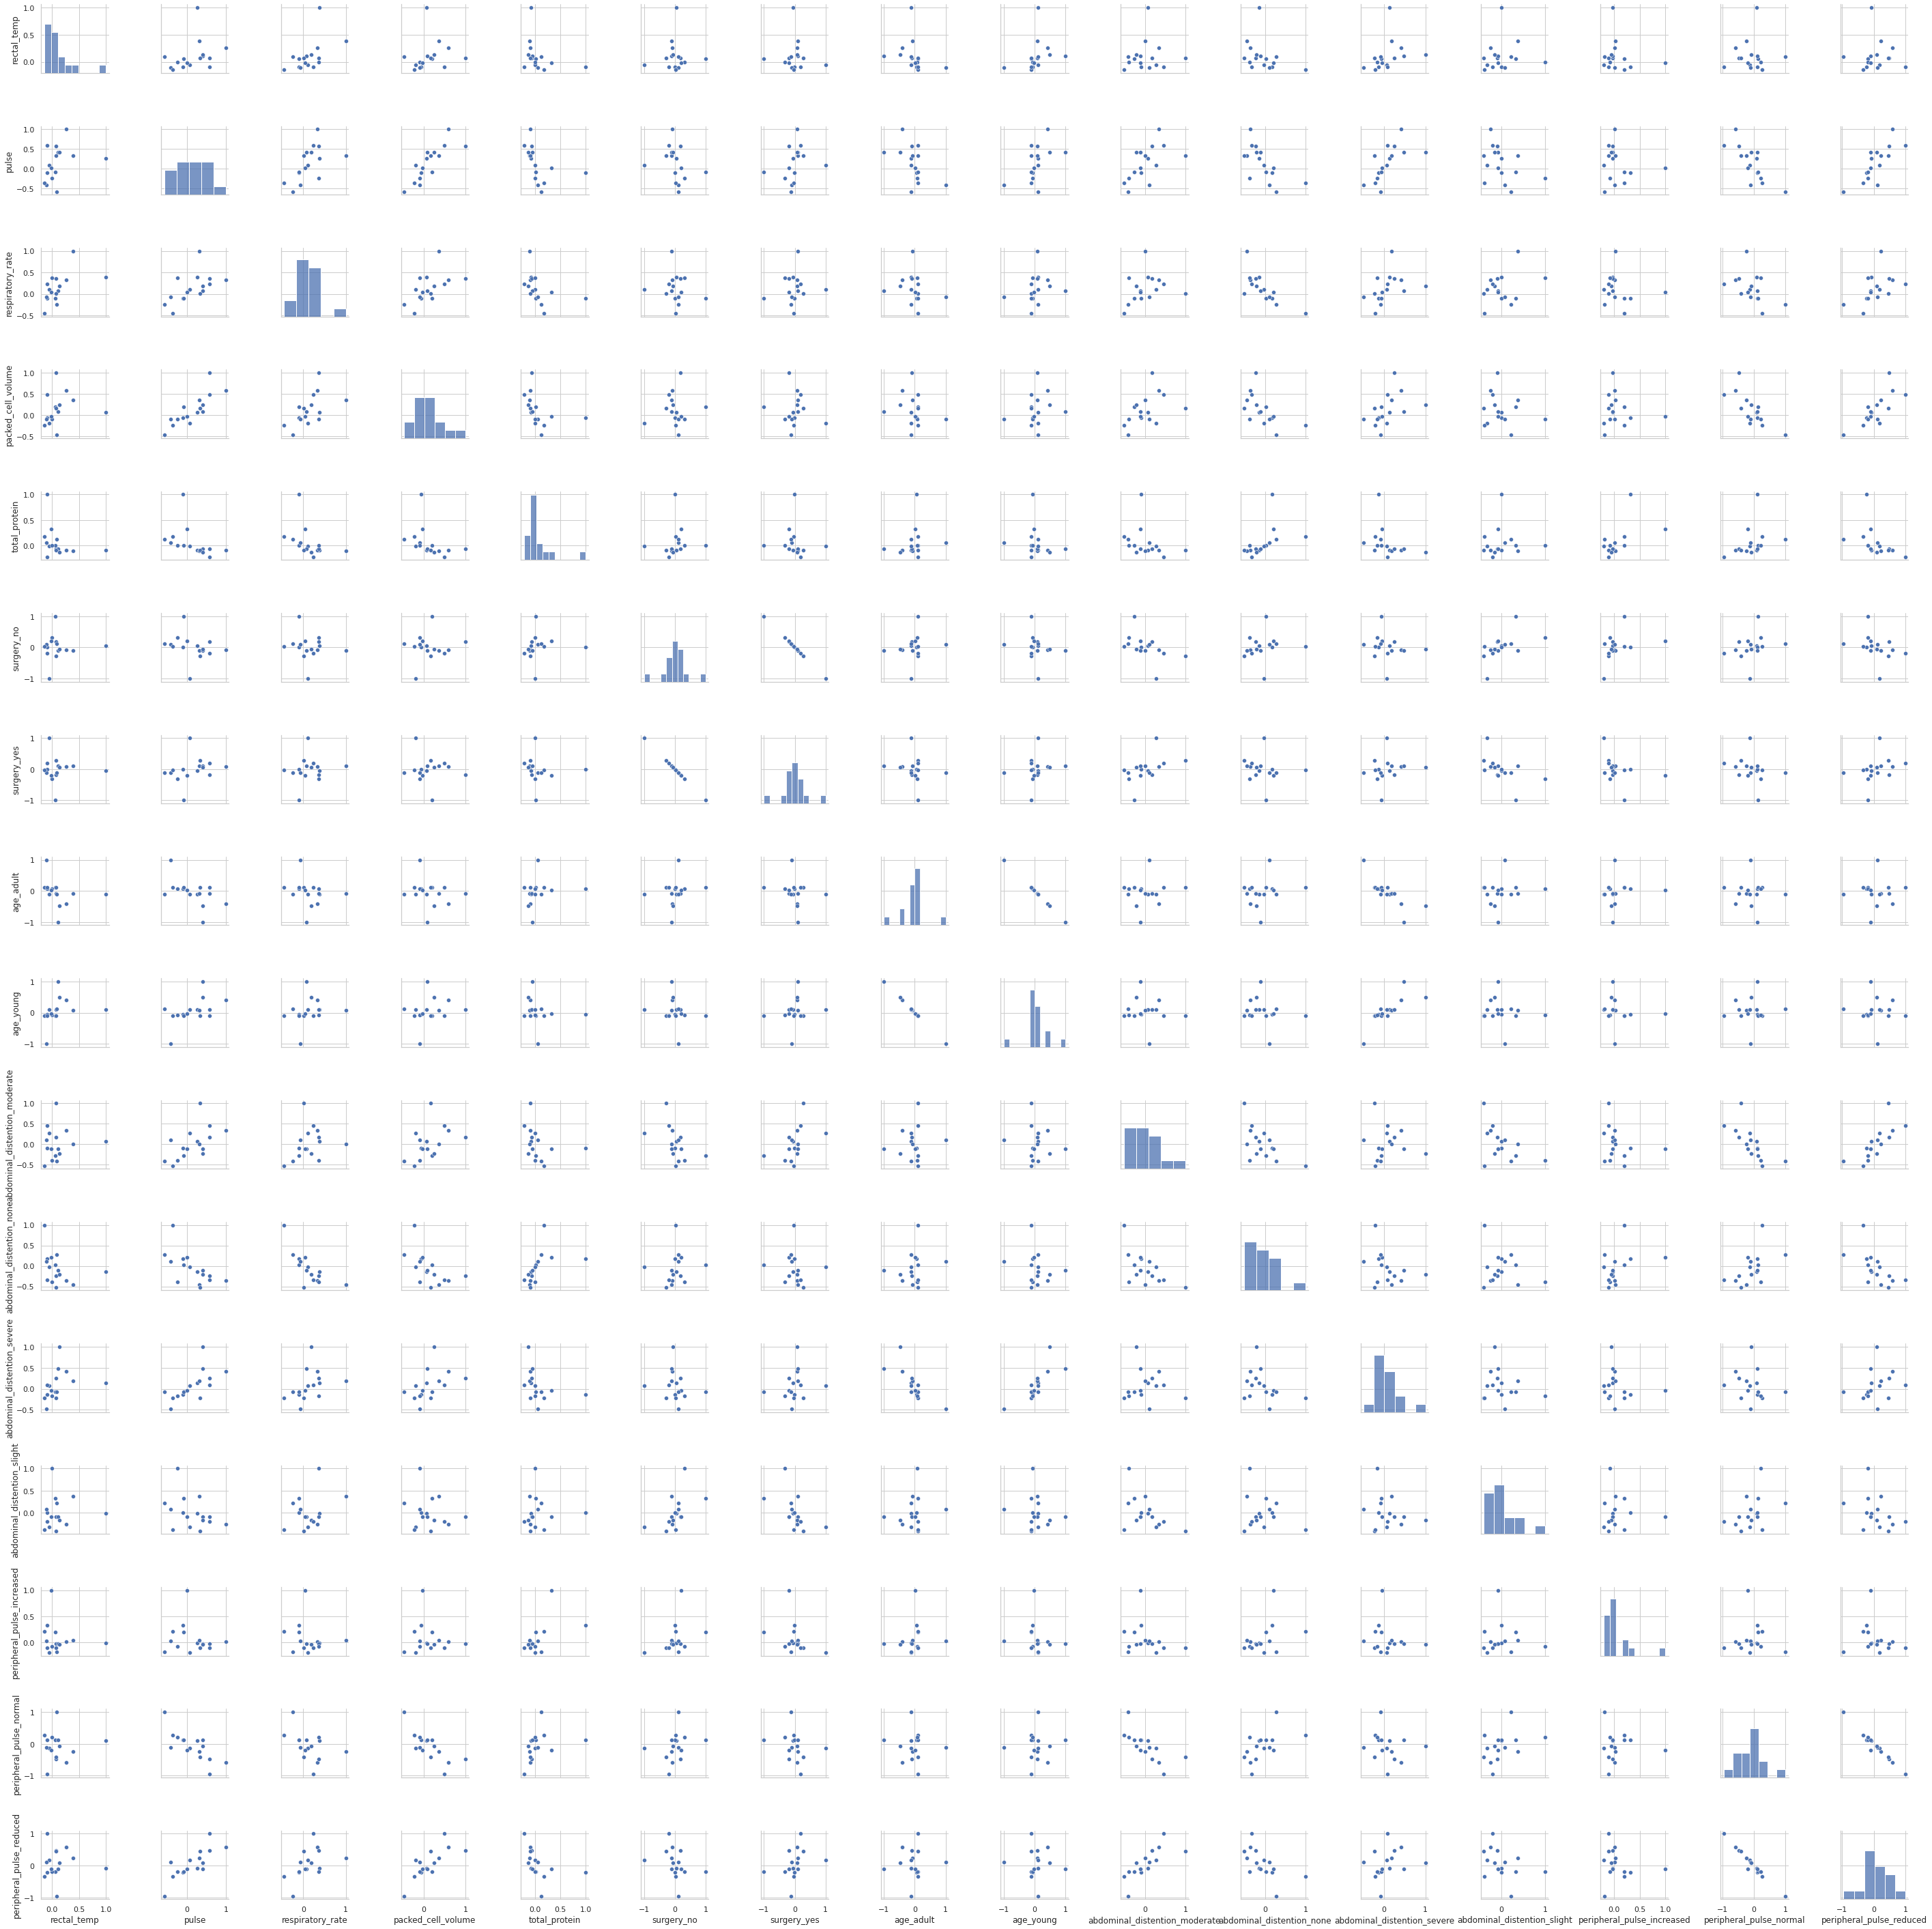

In [ ]:
Selected_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 
                     'surgery_no', 'surgery_yes', 'age_adult','age_young','abdominal_distention_moderate',
                     'abdominal_distention_none','abdominal_distention_severe','abdominal_distention_slight',
                    'peripheral_pulse_increased','peripheral_pulse_normal','peripheral_pulse_reduced']
X = data2[Selected_features]
y = data2['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape
data2.outcome.describe()
(data2.outcome == 0).sum()
sns.pairplot(data2[Selected_features].corr())

plt.show()

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(y_test, moonsY_pred)

log_regr_score:  0.8333333333333334


array([[ 0,  0],
       [ 2, 10]])

Conclusion: The horse colic dataset was classified using a Logistic Regression model, giving a validation accuracy of 83.33%.
Successfully used python tools like Pandas, numpy and sklearn.
Here after using only the correlated columns we can see an increase in the accuracy.